In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [3]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
69,5.6,2.5,3.9,1.1,versicolor
112,6.8,3.0,5.5,2.1,virginica
79,5.7,2.6,3.5,1.0,versicolor
47,4.6,3.2,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa


In [4]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

In [5]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2
59,5.2,2.7,3.9,1.4,1
136,6.3,3.4,5.6,2.4,2
44,5.1,3.8,1.9,0.4,0
9,4.9,3.1,1.5,0.1,0
137,6.4,3.1,5.5,1.8,2
71,6.1,2.8,4.0,1.3,1
51,6.4,3.2,4.5,1.5,1
94,5.6,2.7,4.2,1.3,1


In [6]:
x = iris.iloc[:,0:4]
y = iris['species']

In [7]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [9]:
iris['species'].unique()

array([0, 1, 2])

In [10]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [11]:
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [12]:
#Splitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 10)

In [13]:
y_train

58     1
97     1
129    2
114    2
146    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: species, Length: 120, dtype: int32

# Building Decision Tree Classifier using Gini Criteria

In [14]:
model = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

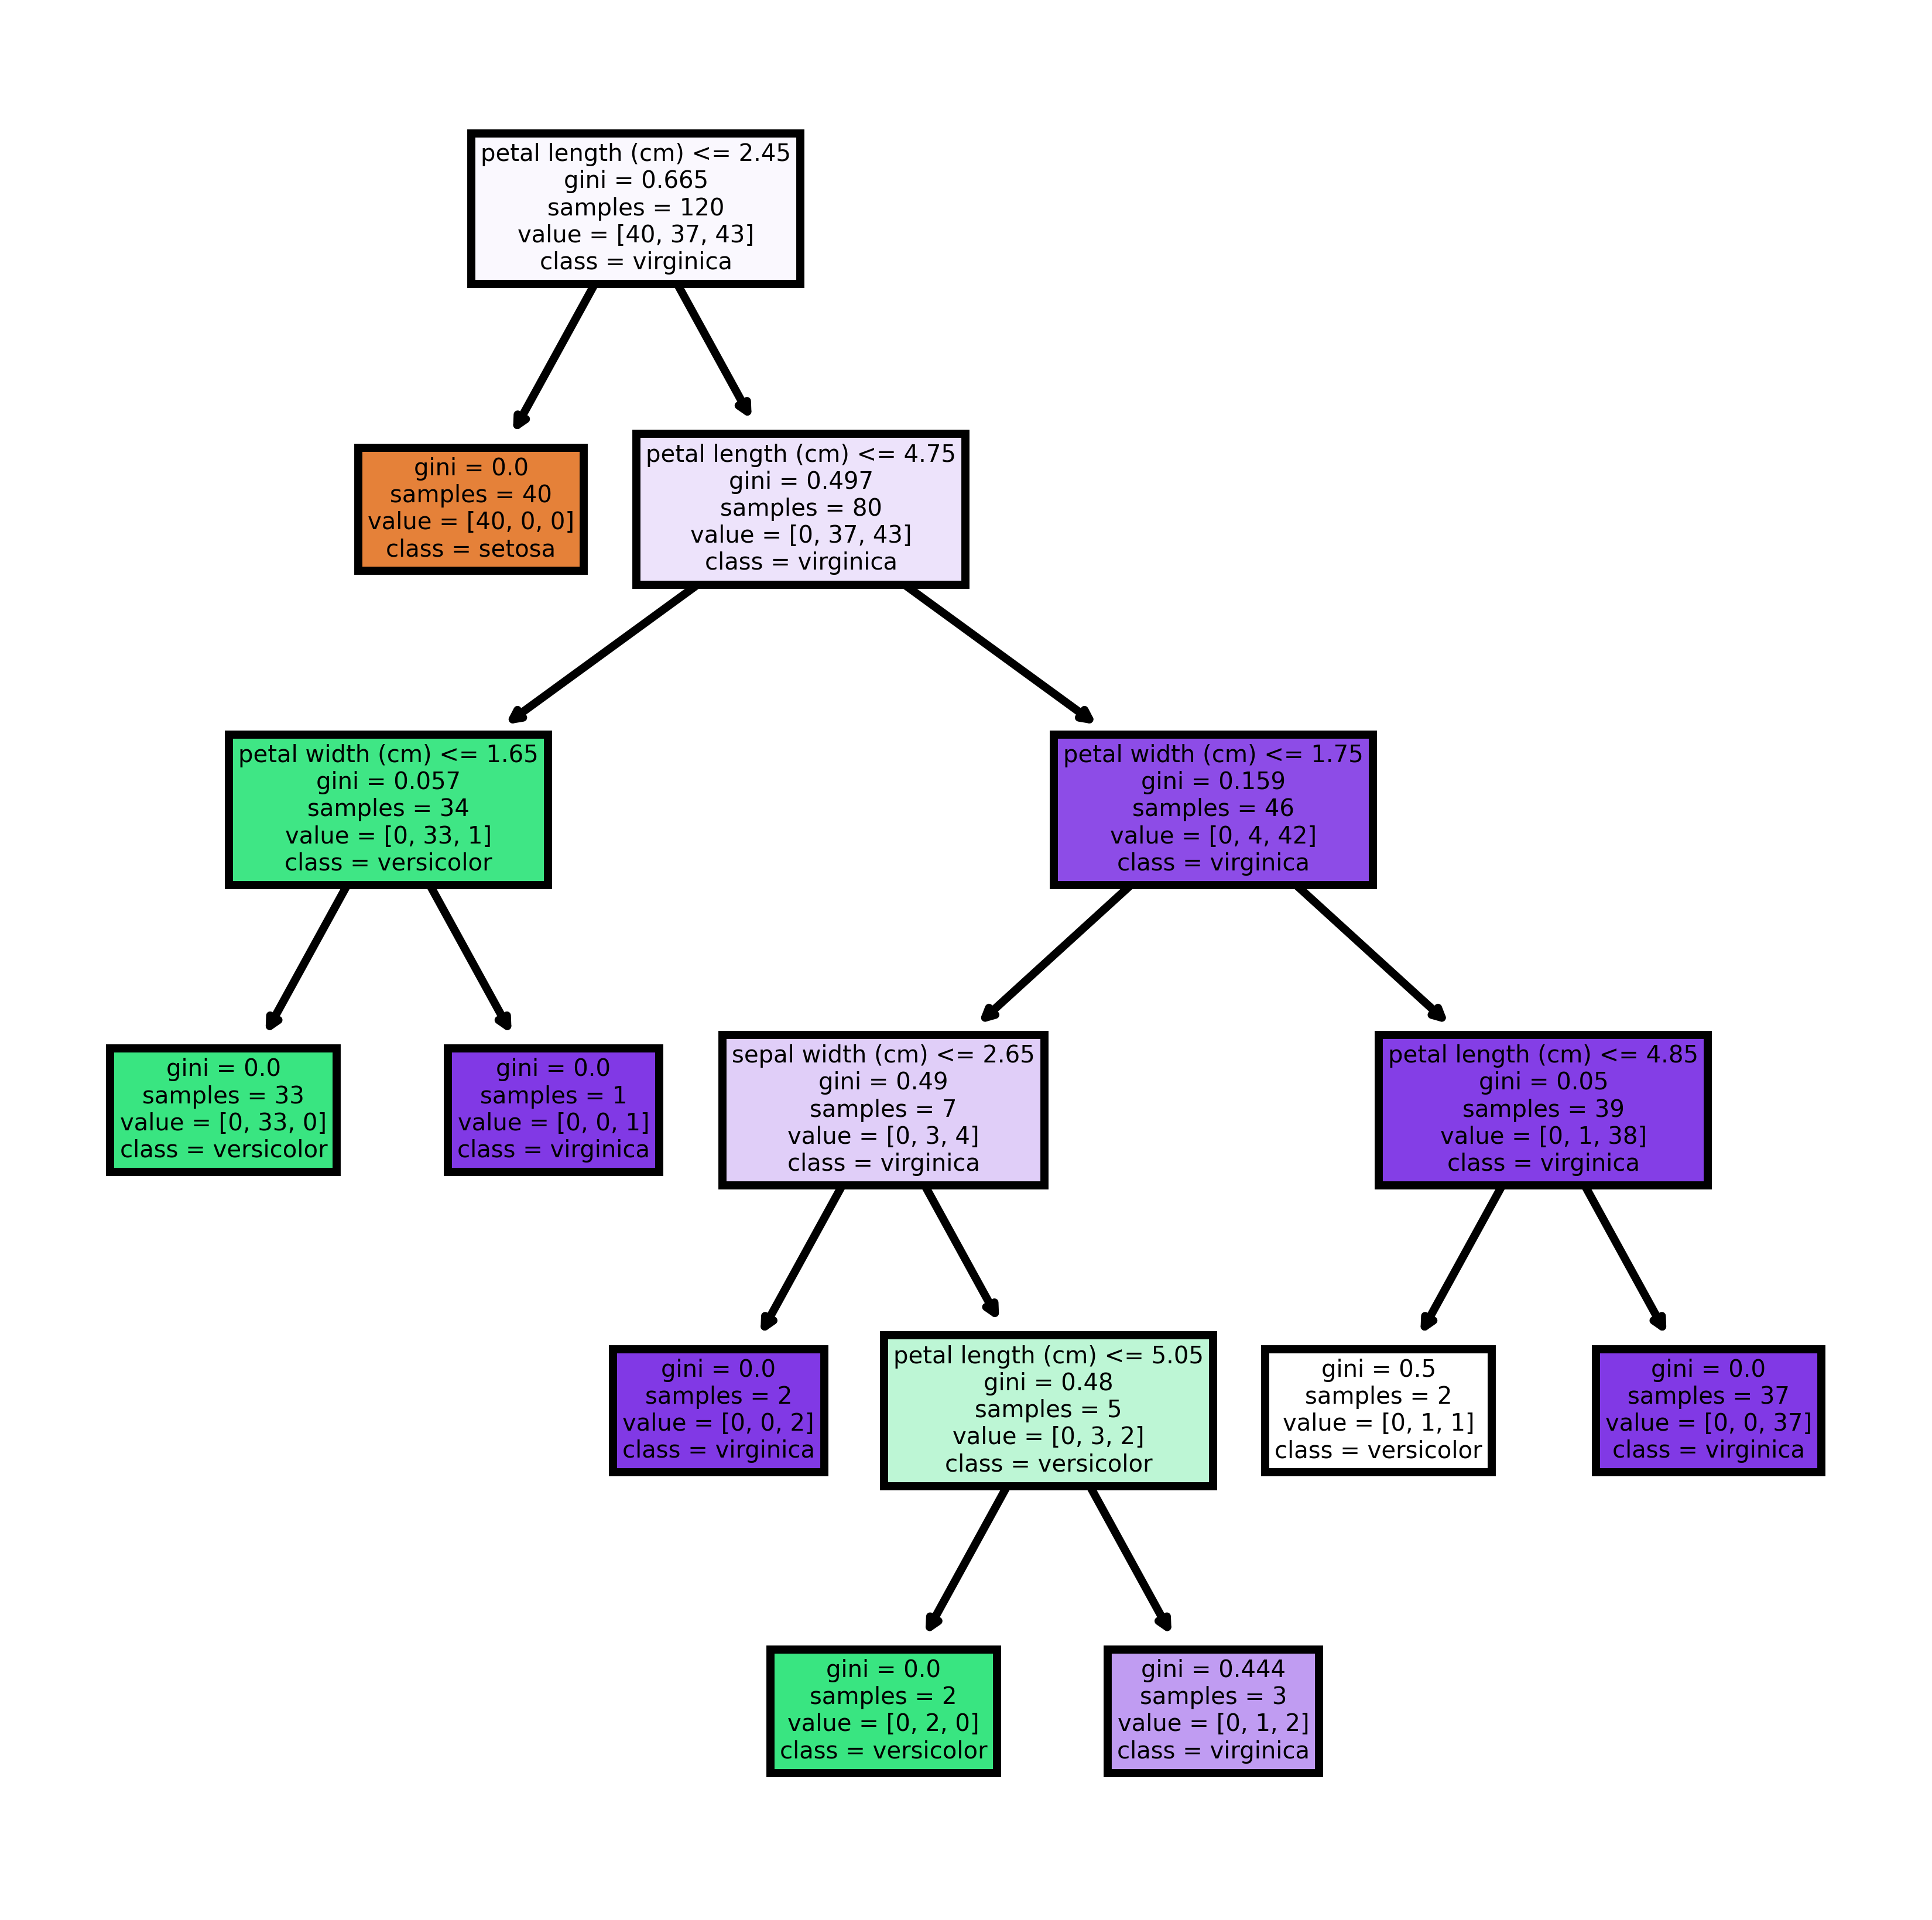

In [15]:
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
cn = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi = 1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) #predicting on test dataset
pd.Series(preds).value_counts() #getting the count of each category


1    13
0    10
2     7
dtype: int64

In [17]:
from sklearn import metrics 
metrics.accuracy_score(preds,y_test)


0.9333333333333333

# Building Decision Tree Classifier(CART) using entropyCriteria

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 5)

In [19]:
y_train

58     1
97     1
129    2
114    2
146    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: species, Length: 120, dtype: int32

In [20]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [21]:
y_train

58     1
97     1
129    2
114    2
146    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: species, Length: 120, dtype: int32

In [22]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [23]:
#Prediction and computing the accuracy
preds = model.predict(x_test)
metrics.accuracy_score(preds,y_test)

1.0